# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from string import Template
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating the DF, lenght is equal to the number of cities randomly generated 
df = pd.DataFrame({"City":cities})
df["Lat"]= ""
df["Lng"]= ""
df["Max Temp"] = ""
df["Humidity"]= ""
df['Cloudiness'] = ""
df["Wind Speed"]= ""
df["Country"] = ""
df["Date"] = ""


In [4]:
# set up a parameters dictionary
params = {
    "units": "&units=Imperial",
    "key": "&appid=" + weather_api_key
}
# generating the API url, We're using a temple string to easily replace the values using keyword substitution
api = Template("http://api.openweathermap.org/data/2.5/weather?q=${city}${units}${key}")

sets = 1
number = 1
print("Beginning Data Retrieval")
for index,row in df.iterrows():
    params["city"] = row['City']
    base_url = api.substitute(params)
    try:
        weather_response = requests.get(base_url).json()
        print(f"Processing Record {number} of Set {sets} | {row['City']}")
        
        df.loc[index, 'Lat'] = weather_response['coord']['lat']
        df.loc[index, 'Lng'] = weather_response['coord']['lon']
        df.loc[index, 'Max Temp'] = weather_response['main']['temp_max']
        df.loc[index, 'Humidity'] = weather_response['main']['humidity']
        df.loc[index, 'Cloudiness'] =weather_response["clouds"]["all"]
        df.loc[index, 'Wind Speed'] =weather_response['wind']['speed']
        df.loc[index, 'Country'] =weather_response['sys']['country']
        df.loc[index, 'Date'] =int(time.time()) 
        #
    except:
        print("City not found. Skipping...")
    number +=1 
    if number == 51:
        sets += 1
        number = 1
    
    

Beginning Data Retrieval
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | deshnok
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | coruripe
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | kahului
Processing Record 12 of Set 1 | oussouye
Processing Record 13 of Set 1 | severodvinsk
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | valdez
Processing Record 18 of Set 1 | carthage
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | kodiak
Processing Record 23 of Set 1 | khatanga
Processing Re

Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | itaguai
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | kjollefjord
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | moiyabana
City not found. Skipping...
Processing Record 47 of Set 4 | mayo
Processing Record 48 of Set 4 | parabel
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | negombo
Processing Record 1 of Set 5 | tessalit
Processing Record 2 of Set 5 | cambrai
Processing Record 3 of Set 5 | ahipara
Processing Record 4 of Set 5 | mana
Processing Record 5 of Set 5 | kaitangata
Processing Record 6 of Set 5 | labuhan
Processing Record 7 of Set 5 | xiongshi
City not found. Skipping...
Processing Record 8 of Set 5 | nizhnevartovsk
Processing Record 9 of Set 5 | touros
Processing Record 10 of Set 5 | nantucket
Processing Record 11 of Set 5 | kinablangan
Processing Record 12 of Set 5 | half moon bay
Processing Record 13 of Set 5 | vila franca do

Processing Record 28 of Set 8 | kohima
Processing Record 29 of Set 8 | kenai
Processing Record 30 of Set 8 | matadi
Processing Record 31 of Set 8 | zastavna
Processing Record 32 of Set 8 | opuwo
Processing Record 33 of Set 8 | shuangyang
Processing Record 34 of Set 8 | port keats
Processing Record 35 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 36 of Set 8 | maldonado
Processing Record 37 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 38 of Set 8 | kadipaten
Processing Record 39 of Set 8 | alakurtti
Processing Record 40 of Set 8 | werda
Processing Record 41 of Set 8 | hirosaki
Processing Record 42 of Set 8 | puerto escondido
Processing Record 43 of Set 8 | porto san giorgio
Processing Record 44 of Set 8 | sangar
Processing Record 45 of Set 8 | ponta do sol
Processing Record 46 of Set 8 | verkhnyaya inta
Processing Record 47 of Set 8 | coahuayana
Processing Record 48 of Set 8 | kaputa
Processing Record 49 of Set 8 | piacabucu
Processing 

Processing Record 12 of Set 12 | ukiah
Processing Record 13 of Set 12 | brae
Processing Record 14 of Set 12 | bastia
Processing Record 15 of Set 12 | mrirt
City not found. Skipping...
Processing Record 16 of Set 12 | mendahara
City not found. Skipping...
Processing Record 17 of Set 12 | eureka
Processing Record 18 of Set 12 | bukachacha
Processing Record 19 of Set 12 | taybad
Processing Record 20 of Set 12 | port antonio
Processing Record 21 of Set 12 | altoona
Processing Record 22 of Set 12 | sault sainte marie
Processing Record 23 of Set 12 | kidal
Processing Record 24 of Set 12 | nemuro
Processing Record 25 of Set 12 | tarko-sale
Processing Record 26 of Set 12 | khash
Processing Record 27 of Set 12 | tando jam
Processing Record 28 of Set 12 | zhigalovo
Processing Record 29 of Set 12 | miranda
Processing Record 30 of Set 12 | khandyga
Processing Record 31 of Set 12 | linares
Processing Record 32 of Set 12 | wajima
Processing Record 33 of Set 12 | nishiwaki
Processing Record 34 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df=df.replace('',np.nan).dropna(axis = 0, how = 'any')
df.index.names = ["City_ID"]
df.to_csv(output_data_file)


In [6]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.00000,555.000000,555.000000,5.550000e+02
mean,17.253245,21.992595,54.051135,70.25045,47.457658,8.288072,1.614711e+09
std,33.941592,90.770474,30.859153,21.88121,40.449544,5.527148,6.145971e+01
min,-54.800000,-179.166700,-42.340000,10.00000,0.000000,0.450000,1.614711e+09
25%,-12.404800,-55.115800,34.990000,58.50000,1.000000,4.000000,1.614711e+09
50%,18.904800,26.433300,64.990000,76.00000,40.000000,7.070000,1.614711e+09
75%,43.515300,102.252050,78.465000,86.50000,90.000000,11.500000,1.614711e+09
max,78.218600,178.416700,100.400000,100.00000,100.000000,39.120000,1.614711e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_grt_100 = df[df["Humidity"] > 100]
humidity_grt_100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

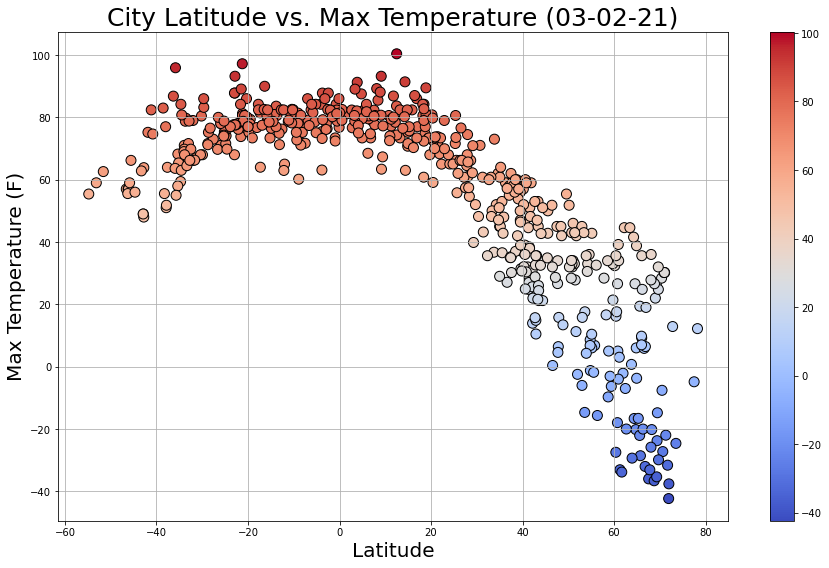

In [10]:
latitues = df['Lat']
temps = df['Max Temp']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Max Temperature ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (F)",fontsize=20)
ax = plt.scatter(latitues, temps, s=100, c=temps, cmap='coolwarm', edgecolors="black" )
plt.colorbar()
plt.savefig("Temp_city.png")

<center><i><h1 style="background-color:powderblue;">Latitude vs. Temperature Plot</h1></i></center>
<div style="background-color:LightSlateGray">
<p style="color:white;font-size:150%;background-color:LightSlateGray"> This plot demostrates that the temperature changes based on the latitude with respect to the equator, in both directions(south and North) </p>
</div>

## Latitude vs. Humidity Plot

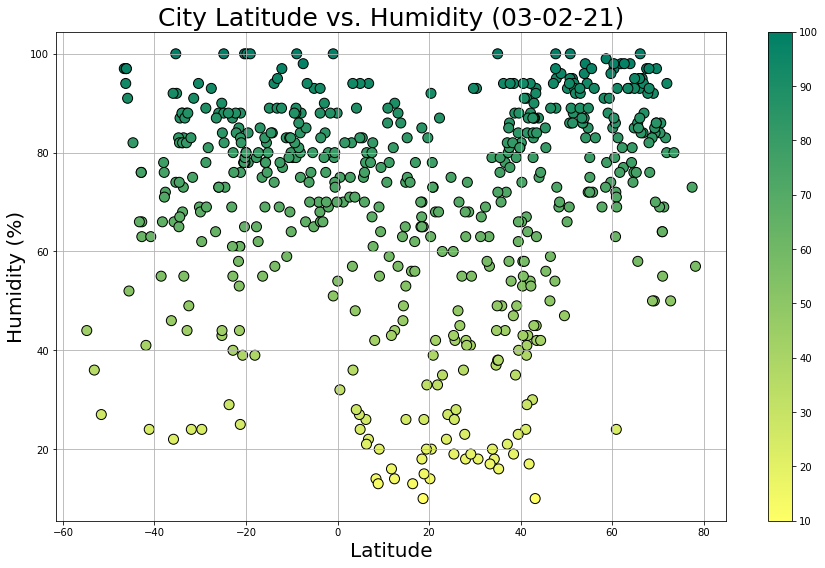

In [11]:
latitues = df['Lat']
humidity  = df['Humidity']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Humidity ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)",fontsize=20)
ax = plt.scatter(latitues, humidity, s=100, c=humidity, cmap='summer_r', edgecolors="black" )
plt.colorbar()
plt.savefig("../Output_Data/Humidity_city.png")

<center><i><h1 style="background-color:powderblue;">Latitude vs. Humidity Plot</h1></i></center>
<div style="background-color:LightSlateGray">
<ul>
    <li>
        <p style="color:white;font-size:150%;background-color:LightSlateGray"> This plot doesn't show an apparent relation between
     the latitude(on either hemisphere) and the humidity at that specific latitude. we can see that the behavior it's ver similar on both hemispheres.</p>
    </li>
    <li>
        <p style="color:white;font-size:150%;background-color:LightSlateGray"> But if we pay close attention to the chart we can see that the humidity close to the equator tend to be almost always highg.</p>
    </li>
    </ul>
</div>

## Latitude vs. Cloudiness Plot

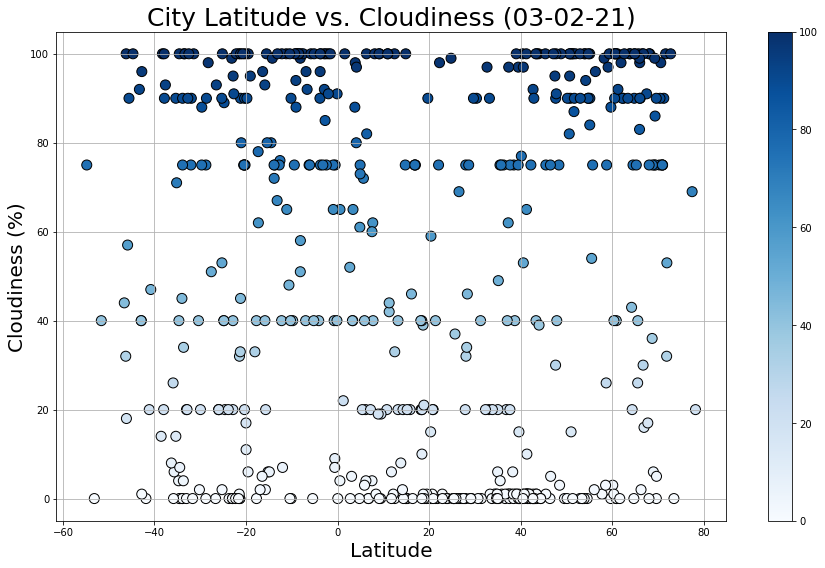

In [12]:
latitues = df['Lat']
cloudiness  = df['Cloudiness']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Cloudiness ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)",fontsize=20)
ax = plt.scatter(latitues, cloudiness, s=100, c=cloudiness, cmap='Blues', edgecolors="black" )
plt.colorbar()
plt.savefig("Cloudiness_city.png")

<center><i><h1 style="background-color:powderblue;">Latitude vs. Cloudiness Plot</h1></i></center>
<div style="background-color:LightSlateGray">
<ul>
    <li>
        <p style="color:white;font-size:150%;background-color:LightSlateGray"> This plot doesn't show an apparent relation between
     the latitude(on either hemisphere) and the cloudiness at that specific latitude. we can see that the behavior it's ver similar on both hemispheres.</p>
    </li>
    </ul>
</div>

## Latitude vs. Wind Speed Plot

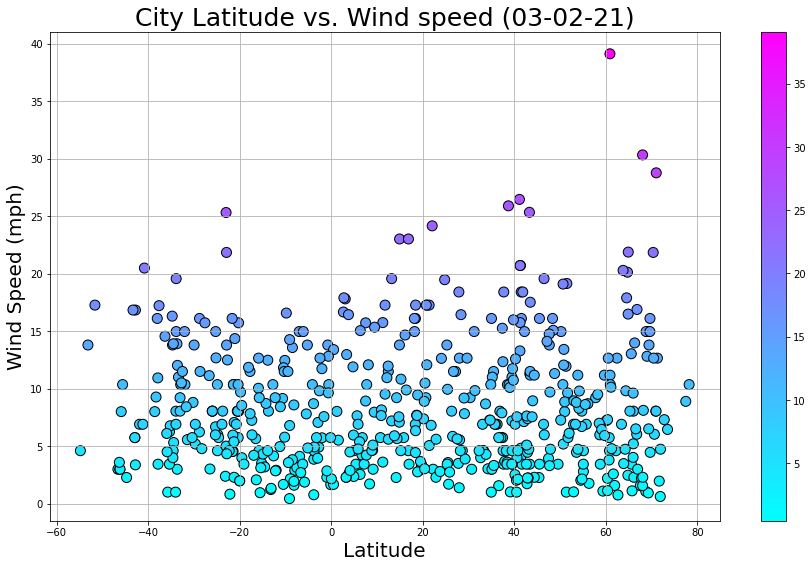

In [13]:
latitues = df['Lat']
wind_speed  = df['Wind Speed']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Wind speed ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)",fontsize=20)
ax = plt.scatter(latitues, wind_speed, s=100, c=wind_speed, cmap='cool', edgecolors="black" )
plt.colorbar()
plt.savefig("wind_sped_city.png")

## Linear Regression

In [14]:
# obtaining Cities located in the northenrn and southern hemispheres
northern_hemisphere_df = df[df['Lat'] >= 0]
southern_hemisphere_df = df[df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7574726942595871


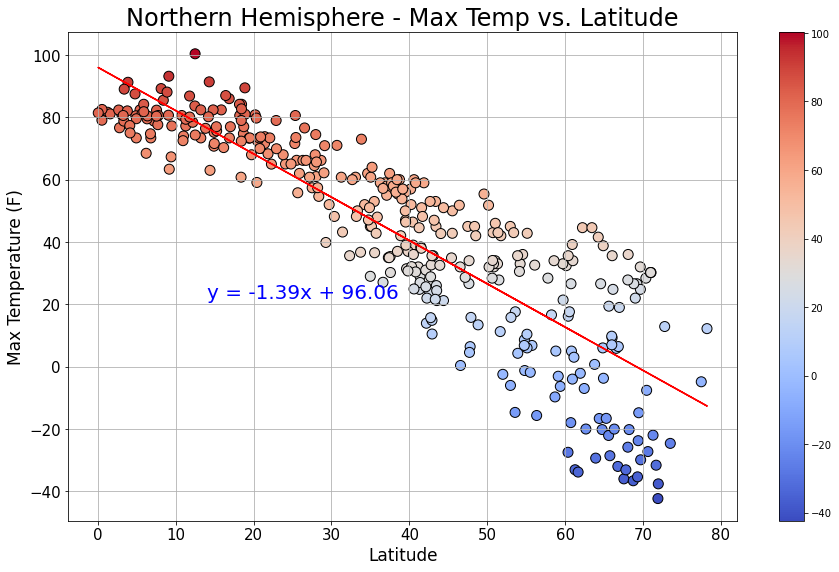

In [15]:
n_lats = northern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
n_temps = northern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_temps)

regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Northern Hemisphere - Max Temp vs. Latitude", fontsize=24, )
plt.scatter(n_lats,n_temps, s=100, c=n_temps, cmap='coolwarm', edgecolors="black")
plt.plot(n_lats,regress_values,"r-")

plt.annotate(line_eq,(14,22),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Max Temperature (F)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.32702080552156704


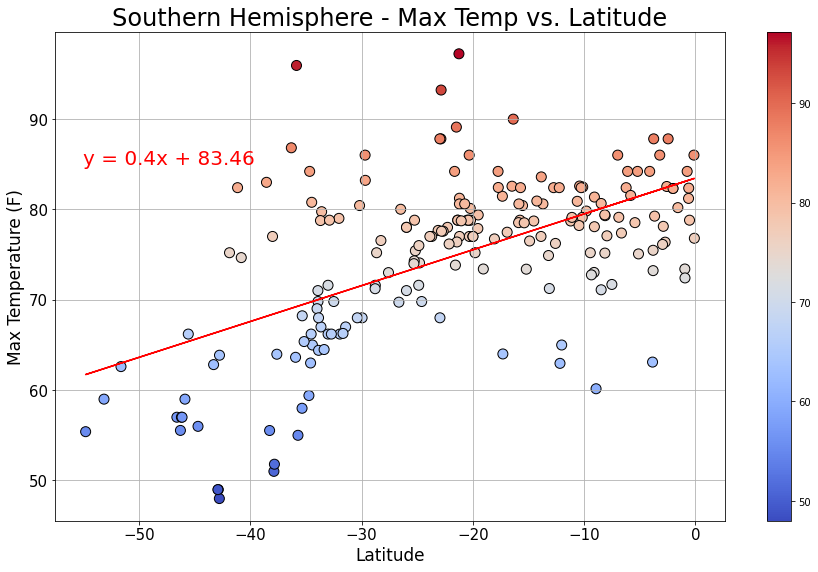

In [16]:
s_lats =  southern_hemisphere_df['Lat']  # latitudes for cities in the Southern hemisphere
s_temps = southern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_temps)

regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Southern Hemisphere - Max Temp vs. Latitude", fontsize=24, )
plt.scatter(s_lats,s_temps, s=100, c=s_temps, cmap='coolwarm', edgecolors="black")
plt.plot(s_lats,regress_values,"r-")

plt.annotate(line_eq,(-55,85),fontsize=20,color="red")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Max Temperature (F)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.16483103587555226


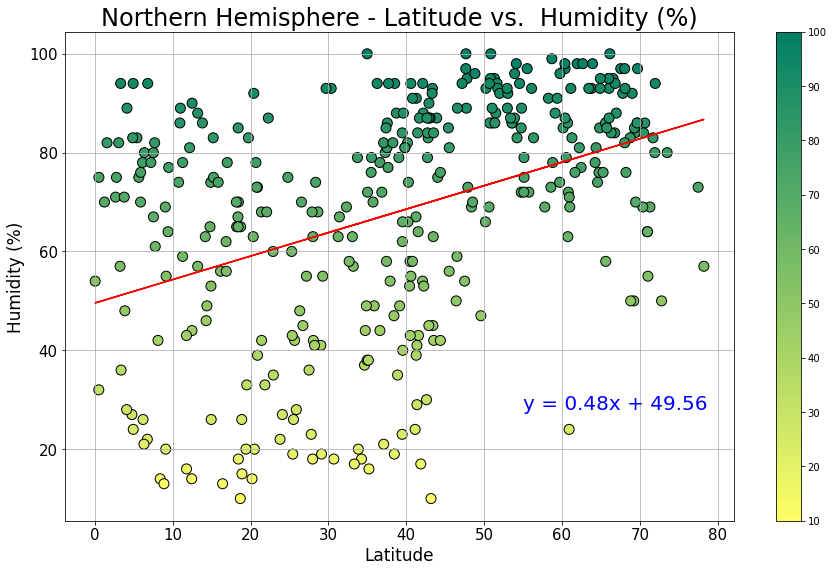

In [17]:
n_lats = northern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
n_humidity = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_humidity)

regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Northern Hemisphere - Latitude vs.  Humidity (%)", fontsize=24, )
plt.scatter(n_lats,n_humidity, s=100, c=n_humidity, cmap='summer_r', edgecolors="black")
plt.plot(n_lats,regress_values,"r-")

plt.annotate(line_eq,(55,28),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Humidity (%)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.05322014811683847


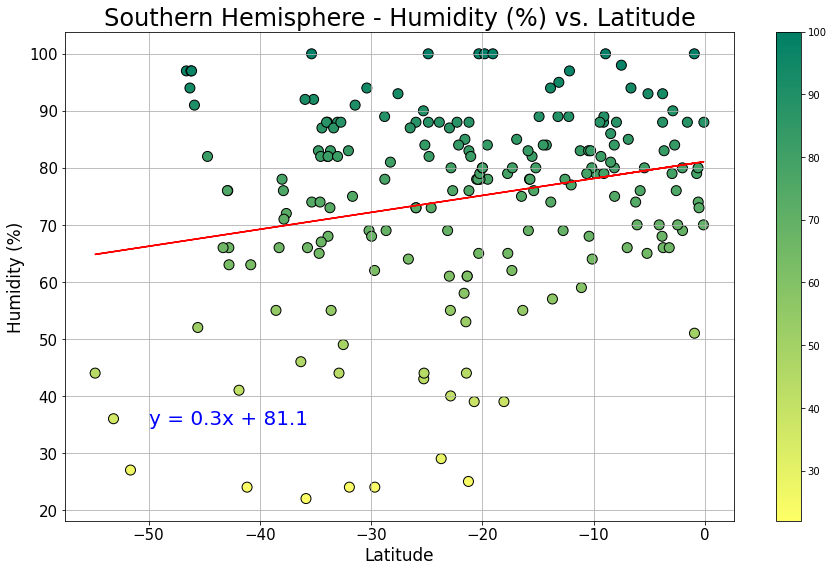

In [26]:
s_lats = southern_hemisphere_df['Lat']  # latitudes for cities in the southern hemisphere
s_humidity = southern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_humidity)

regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude", fontsize=24, )
plt.scatter(s_lats,s_humidity, s=100, c=s_humidity, cmap='summer_r', edgecolors="black")
plt.plot(s_lats,regress_values,"r-")

plt.annotate(line_eq,(-50,35),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Humidity (%)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.07577017739201254


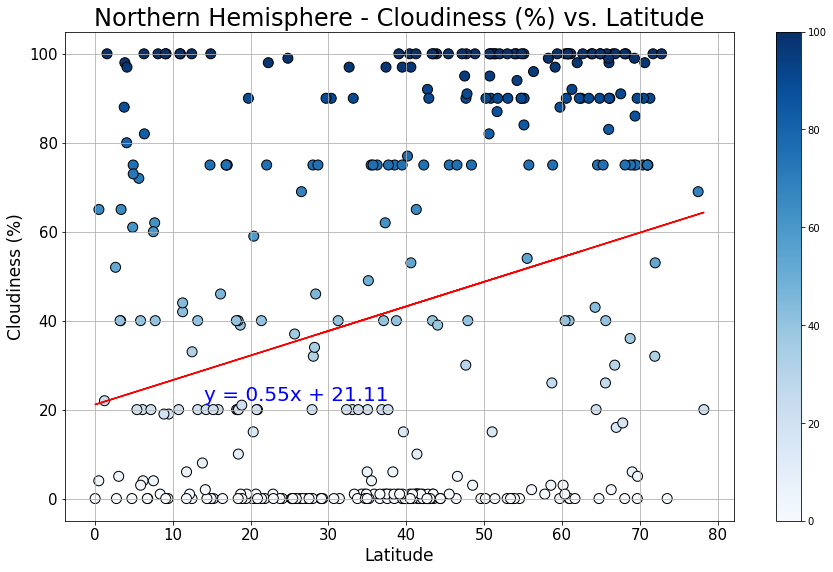

In [19]:
n_lats = northern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
n_clouds = northern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_clouds)

regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude", fontsize=24, )
plt.scatter(n_lats,n_clouds, s=100, c=n_clouds, cmap='Blues', edgecolors="black")
plt.plot(n_lats,regress_values,"r-")

plt.annotate(line_eq,(14,22),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Cloudiness (%)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.062087015265333695


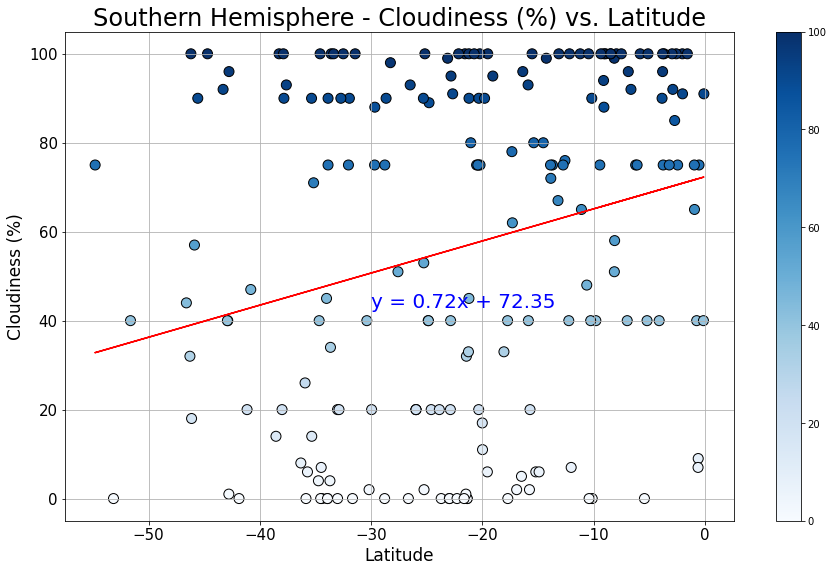

In [20]:
s_lats = southern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
s_clouds = southern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_clouds)

regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude", fontsize=24, )
plt.scatter(s_lats,s_clouds, s=100, c=s_clouds, cmap='Blues', edgecolors="black")
plt.plot(s_lats,regress_values,"r-")

plt.annotate(line_eq,(-30,43),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Cloudiness (%)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0006487120146872704


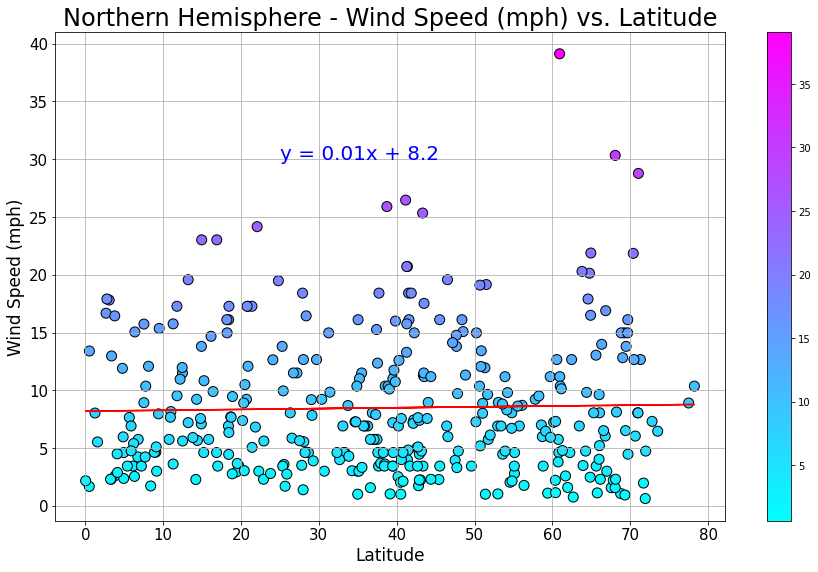

In [23]:
n_lats = northern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
n_winds = northern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_winds)

regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude", fontsize=24, )
plt.scatter(n_lats,n_winds, s=100, c=n_winds, cmap='cool', edgecolors="black")
plt.plot(n_lats,regress_values,"r-")

plt.annotate(line_eq,(25,30),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Wind Speed (mph)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.02935813261815015


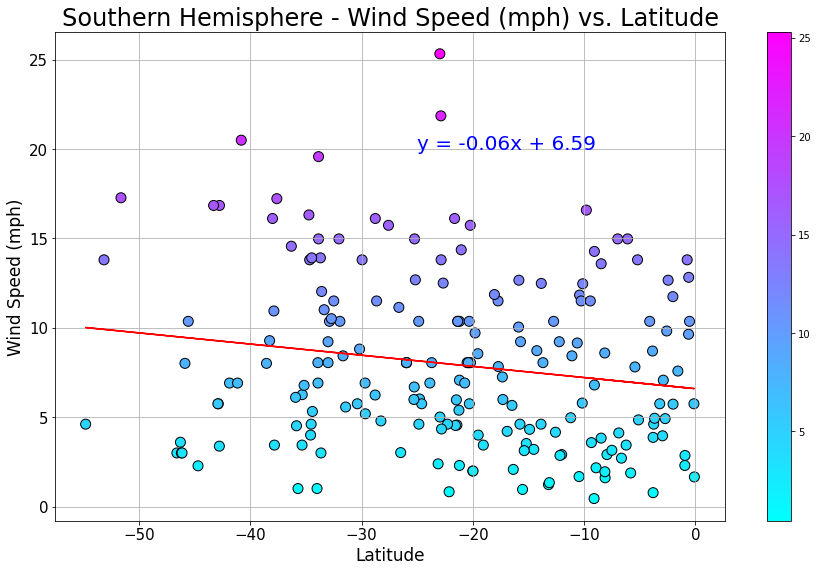

In [25]:
s_lats = southern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
s_winds = southern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_winds)

regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude", fontsize=24, )
plt.scatter(s_lats,s_winds, s=100, c=s_winds, cmap='cool', edgecolors="black")
plt.plot(s_lats,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Wind Speed (mph)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}");